# INTRODUCTION TO NLP

NATURAL LANGUAGE PROCESSING (NLP) is  field of computer science and  linguistics concerned with designing and developing  systems that enable interaction between machines and human using natural language. NLP is a branch of Artificial Intelligence that is capable  to understand and process human language.

NLP works with unstructured data (mainly text) that usually belongs to a specific language following specific syntax and semantics.

Real world application are Text Atocomplte on Mobile devices and  Search engine, Classification of Mails, Chatbots,
Speech recognition, Google translator, Analysing customer review or feedback etc.



# Application

Machine translation is the process in which a system automatically translate content (text/speech) from one language (the source) to another 
(the target) without any human input. e,g Google Transalaor, Amazon translator etc

Speech recognition system Speech recognition, or speech-to-text, is the ability of a machine to identify (natural) words spoken aloud and convert them into readable text. Exmplae of speech regnition system is Voice assisstan like Cortana, Siri etc


Question Answering Systems  is concerned with developing systems that 
automatically retrieve correct answers to the questions asked by human in natural language.


Text summarization Text summarization is the technique for generating a concise and precise summary of voluminous texts while focusing on the sections that convey useful information,
and without losing the overall meaning.

Text categorization is the process of assigning label or class to a given text

text generation


# Text Analytics

Text analytics , also known as text mining , is the methodology and process followed 
to derive quality and actionable information and insights from textual data. This involves 
using NLP, information retrieval, and machine learning techniques to parse unstructured 
text data into more structured forms and deriving patterns and insights from this data 
that would be helpful for the end user. 
Examples of operations in text analytics:.
• Text classification 
• Text clustering 
• Text summarization 
• Sentiment analysis 
• Entity extraction and recognition 
• Similarity analysis 

Doing text analytics involves converting the unstructured text data into a format acceptable by machine learning algorithms. 

The process of converting the unstructured text data into machine readable format is called text processing. 

Text processing, or to be more specific, pre-processing, involves using a variety of techniques to convert raw text into well defined sequences of linguistic components that have standard structure.

Example of text processing iclude
• Tokenization 
• POS Tagging 
• Chunking 
• Stemming 
• Lemmatization 
• dealing with misspelled text
• removing stopwords
• removing puntuation 
• Bag of wordz etc

# Frameworks for NLP
•NLTK: Natural language toolkit and commonly called the mother of all 
NLP libraries. It is one of the mature primary resources when it comes to 
Python and NLP.

•SpaCy: SpaCy is recently a trending library, as it comes with the added 
flavors of a deep learning framework. While SpaCy doesn’t cover all of the 
NLP functionalities, the things that it does do, it does really well.

•TextBlob: This is one of the data scientist’s favorite library when it 
comes to implementing NLP tasks. It is based on both NLTK and Pattern. 
However, TextBlob certainly isn’t the fastest or most complete library.

•CoreNLP: It is a Python wrapper for Stanford CoreNLP. The toolkit 
provides very robust, accurate, and optimized techniques for tagging, 
parsing, and analyzing text in various languages.

VaderSent, Genism, gTTS etc

reference: Text Analytics with Python — Dipanjan Sarkar

# EMAIL CLASSIFFICATION

In [68]:
#importing needed modules
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#import text data
my_messages = pd.read_csv('SMSSpamCollection', sep='\t', names= ['label','message'])

In [3]:
my_messages.head()  #print out the first five elements in the dataframe

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
my_messages.describe()#descriptive statisrics of te text data

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#checking the number of count and ham messages
my_messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
#add another column that shows the length of characters in each message
my_messages['message_length'] = my_messages['message'].apply(len) 

In [8]:
print(my_messages.head())

  label                                            message  message_length
0   ham  Go until jurong point, crazy.. Available only ...             111
1   ham                      Ok lar... Joking wif u oni...              29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155
3   ham  U dun say so early hor... U c already then say...              49
4   ham  Nah I don't think he goes to usf, he lives aro...              61


In [8]:
print(my_messages['message'].loc[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [9]:
#check the message with highest length
print(my_messages.max())

label                                                          spam
message           … we r stayin here an extra week, back next we...
message_length                                                  910
dtype: object


In [11]:
#printing out the max length 
print(my_messages['message'].loc[910])

January Male Sale! Hot Gay chat now cheaper, call 08709222922. National rate from 1.5p/min cheap to 7.8p/min peak! To stop texts call 08712460324 (10p/min)


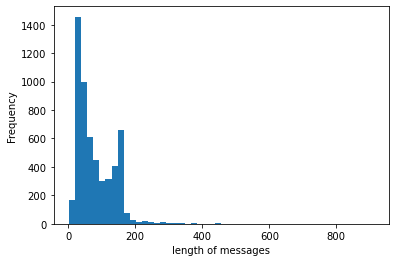

In [11]:
#plotting the histogram for length of messages
my_messages['message_length'].plot.hist( bins=50)
plt.xlabel('length of messages')
plt.show();

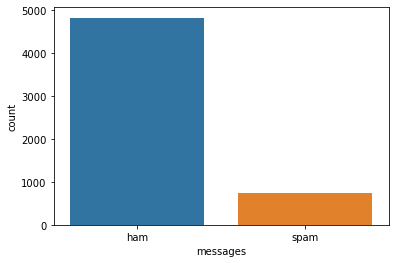

In [13]:
sns.countplot(x='label',data=my_messages)
plt.xlabel('messages')
plt.show();

In [17]:
#creating a function that removes punctuation from my messages

def clean_message(message_col):
    result = [word for word in message_col if word.lower() not in string.punctuation]
    result = ''.join(result)
    return result

In [18]:
my_messages['clean message'] = my_messages['message'].apply(clean_message)

In [19]:
my_messages[['message','clean message']].head()

,message,clean message
0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [21]:
print(my_messages['clean message'].loc[910])

January Male Sale Hot Gay chat now cheaper call 08709222922 National rate from 15pmin cheap to 78pmin peak To stop texts call 08712460324 10pmin


In [22]:
#creating a funstion that normalize my messages
def convert_to_lower(clean_message_col):
    new_word = [message.lower() for message in clean_message_col]
    new_word = ''.join(new_word)
    return new_word

In [23]:
my_messages['normalized message'] = my_messages['clean message'].apply(convert_to_lower)

In [24]:
my_messages[['clean message','normalized message']].head()

,clean message,normalized message
0,Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...
1,Ok lar Joking wif u oni,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [25]:
#creating function that remove stop words
stop_words = stopwords.words('english')
def remove_stop_word(norm_messsage_col):
    new_mess = [message for message in norm_messsage_col.split() if message not in stop_words]
    return ' '.join(new_mess)

In [27]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
my_messages['new message'] = my_messages['normalized message'].apply(remove_stop_word)

In [29]:
my_messages['new mess len'] = my_messages['new message'].apply(len)

In [30]:
my_messages.columns

Index(['label', 'message', 'message_length', 'clean message',
       'normalized message', 'new message', 'new mess len'],
      dtype='object')

In [32]:
#checking the length of the message after removing stopwords
my_messages[['message_length','new mess len']].head()

,message_length,new mess len
0,111,82
1,29,23
2,155,135
3,49,35
4,61,43


In [33]:
#checking the final input
my_messages[['normalized message','new message']].head()

,normalized message,new message
0,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say so early hor u c already then say,u dun say early hor u c already say
4,nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [47]:
#creating a function that remove numbers in my messages
def remove_number(clean_message_col):
    new_word = [message for message in clean_message_col.split() if message.isdigit() is False]
    new_word = ' '.join(new_word)
    return new_word

In [48]:
my_messages['final message'] = my_messages['new message'].apply(remove_number)

In [49]:
#did you noticed that it this not renove all punctuation marks, this is wjere the power of 
#regular expression come in
my_messages[['new message', 'final message']].head()

,new message,final message
0,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...,free entry wkly comp win fa cup final tkts 21s...
3,u dun say early hor u c already say,u dun say early hor u c already say
4,nah dont think goes usf lives around though,nah dont think goes usf lives around though


In [50]:
print(my_messages['final message'].loc[910])

january male sale hot gay chat cheaper call national rate 15pmin cheap 78pmin peak stop texts call 10pmin


# DATA MODELLING

In [51]:
#spliting my message to X and y 
X = my_messages['new message'] 
y = my_messages['label']

In [52]:
#splitting it into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30)

In [53]:
#generating bag of word for my message 
my_messagesCV = CountVectorizer()
my_messagesCV.fit(X)
message_trainCV = my_messagesCV.transform(X_train)
message_testCV = my_messagesCV.transform(X_test)

In [54]:
#standardizing the bag od word generated 
tfidf = TfidfTransformer()
message_train_tfidf = tfidf.fit_transform(message_trainCV)

In [57]:
tfidf = TfidfTransformer()
message_test_tfidf = tfidf.fit_transform(message_testCV)

#note that bag of word and tf idf is done separately to avoid data leakage

In [58]:
#building a decision tree classfier
dtc = DecisionTreeClassifier()

In [60]:
#fitting the model using default hyperparameter
#hyperparametet tuning is a topic for another day
dtc.fit(message_train_tfidf,y_train)

DecisionTreeClassifier()

In [63]:
#using our decision tree model to classify text messsages
dtc_prediction = dtc.predict(message_test_tfidf)

In [64]:
print('The accuracy using decision tree model is :', accuracy_score(prediction,y_test))

The accuracy using decision tree model is : 0.9605263157894737


In [65]:
print('The confusion matrix using decision tree moddel is :\n',confusion_matrix(dtc_prediction,y_test))


The confusion matrix using decision tree moddel is :
 [[1431   43]
 [  23  175]]


In [66]:
print('The classifiication report using decison tree model is :\n',classification_report(dtc_prediction,y_test))

The classifiication report using decison tree model is :
               precision    recall  f1-score   support

         ham       0.98      0.97      0.98      1474
        spam       0.80      0.88      0.84       198

    accuracy                           0.96      1672
   macro avg       0.89      0.93      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [69]:
nb = MultinomialNB()

In [71]:
nb.fit(message_train_tfidf,y_train)

MultinomialNB()

In [72]:
#using our naive bayes model to classify text messsages
nb_prediction = nb.predict(message_test_tfidf)

In [73]:
print('The accuracy using naive bayes model is :', accuracy_score(nb_prediction,y_test))

The accuracy using naive bayes model is : 0.9611244019138756


In [74]:
print('The confusion matrix using naive bayes moddel is :\n',confusion_matrix(nb_prediction,y_test))


The confusion matrix using naive bayes moddel is :
 [[1454   65]
 [   0  153]]


In [75]:
print('The classifiication report using naive bayes model is :\n',classification_report(nb_prediction,y_test))

The classifiication report using naive bayes model is :
               precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1519
        spam       0.70      1.00      0.82       153

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



In [76]:
result =pd.DataFrame({'Actual value':y_test,'DTC prediction':dtc_prediction,
                    'NB prediction':nb_prediction })
result.head(15)

,Actual value,DTC prediction,NB prediction
4341,ham,ham,ham
289,ham,ham,ham
984,ham,ham,ham
516,ham,ham,ham
1511,ham,ham,ham
3036,ham,ham,ham
3316,spam,ham,spam
2545,ham,ham,ham
398,ham,ham,ham
1917,ham,ham,ham
